<img src="https://nserc-hi-am.ca/2020/wp-content/uploads/sites/18/2019/12/McGill.png" width="500" height="400" align="left">

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


# INSY 695: Final Group Project
#### Arnaud Guzman-Annès | ID: 260882529
#### Jules Zielinski Babu | ID: 
#### Ram Babu | ID: 260958970
#### Dorothy Zou | ID: 260950477
#### Rameez Rosul | ID: 
#### Johnny Qiao | ID: 

<br>
<br>

**Date: April 1st, 2021**
<br>
<br>

In [10]:
## Initial setup

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import io
import requests
import pandas as pd
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter
import plotly.express as px
from imblearn.over_sampling import SMOTE
import numpy
from yellowbrick.features import RFECV
import phate

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
pd.options.mode.chained_assignment = None  # default='warn'

#display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Sets seed for the entire notebook

np.random.seed(42)

In [3]:
# Import data

url = "https://raw.githubusercontent.com/arguz95/Project_ML2/master/Data/bankrupcy.csv"
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))
bankruptcy = df.copy() # we can use this as raw data afterwards

In [4]:
df.head()

Bankrupt?  ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594         
1          1                                           0.464291         
2          1                                           0.426071         
3          1                                           0.399844         
4          1                                           0.465022         

   ROA(A) before interest and % after tax  \
0                                0.424389   
1                                0.538214   
2                                0.499019   
3                                0.451265   
4                                0.538432   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                           0.405750                0.601457   
1                                           0.516730                0.610235   
2                                           0.472295                0.601450   
3                                           0.457733                0.583541   
4                                           0.522298                0.598783   

   Realized Sales Gross Margin  Operating Profit Rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   
2                     0.601364               0.998857   
3                     0.583541               0.998700   
4                     0.598783               0.998973   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                   0.796887                     0.808809   
1                   0.797380                     0.809301   
2                   0.796403                     0.808388   
3                   0.796967                     0.808966   
4                   0.797366                     0.809304   

   Non-industry income and expenditure/revenue  \
0                                     0.302646   
1                                     0.303556   
2                                     0.302035   
3                                     0.303350   
4                                     0.303475   

   Continuous interest rate (after tax)  Operating Expense Rate  \
0                              0.780985            1.256970e-04   
1                              0.781506            2.897850e-04   
2                              0.780284            2.361300e-04   
3                              0.781241            1.078890e-04   
4                              0.781550            7.890000e+09   

   Research and development expense rate  Cash flow rate  \
0                                    0.0        0.458143   
1                                    0.0        0.461867   
2                             25500000.0        0.458521   
3                                    0.0        0.465705   
4                                    0.0        0.462746   

   Interest-bearing debt interest rate  Tax rate (A)  Net Value Per Share (B)  \
0                             0.000725           0.0                 0.147950   
1                             0.000647           0.0                 0.182251   
2                             0.000790           0.0                 0.177911   
3                             0.000449           0.0                 0.154187   
4                             0.000686           0.0                 0.167502   

   Net Value Per Share (A)  Net Value Per Share (C)  \
0                 0.147950                 0.147950   
1                 0.182251                 0.182251   
2                 0.177911                 0.193713   
3                 0.154187                 0.154187   
4                 0.167502                 0.167502   

   Persistent EPS in the Last Four Seasons  Cash Flow Per Share  \
0                                 0.169141             0.311664   
1                                 0.208944             0.318137   
2                 

*No missing values and no categorical variables in the dataset*

In [6]:
# Some more information about the dataset


#display(df.shape)
#display(df.isnull().sum())
#display(df.describe())

(6819, 96)

Bankrupt?                                                  0
ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
Realized Sales Gross Margin                                0
Operating Profit Rate                                      0
Pre-tax net Interest Rate                                  0
After-tax net Interest Rate                                0
Non-industry income and expenditure/revenue                0
Continuous interest rate (after tax)                       0
Operating Expense Rate                                     0
Research and development expense rate                      0
Cash flow rate                                             0
Interest-bearing debt interest rate                        0
Tax rate (A)                                               0
Net Value Per Share (B) 

Bankrupt?  ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000         
mean      0.032263                                           0.505180         
std       0.176710                                           0.060686         
min       0.000000                                           0.000000         
25%       0.000000                                           0.476527         
50%       0.000000                                           0.502706         
75%       0.000000                                           0.535563         
max       1.000000                                           1.000000         

       ROA(A) before interest and % after tax  \
count                             6819.000000   
mean                                 0.558625   
std                                  0.065620   
min                                  0.000000   
25%                                  0.535543   
50%                                  0.559802   
75%                                  0.589157   
max                                  1.000000   

       ROA(B) before interest and depreciation after tax  \
count                                        6819.000000   
mean                                            0.553589   
std                                             0.061595   
min                                             0.000000   
25%                                             0.527277   
50%                                             0.552278   
75%                                             0.584105   
max                                             1.000000   

       Operating Gross Margin  Realized Sales Gross Margin  \
count             6819.000000                  6819.000000   
mean                 0.607948                     0.607929   
std                  0.016934                     0.016916   
min                  0.000000                     0.000000   
25%                  0.600445                     0.600434   
50%                  0.605997                     0.605976   
75%                  0.613914                     0.613842   
max                  1.000000                     1.000000   

       Operating Profit Rate  Pre-tax net Interest Rate  \
count            6819.000000                6819.000000   
mean                0.998755                   0.797190   
std                 0.013010                   0.012869   
min                 0.000000                   0.000000   
25%                 0.998969                   0.797386   
50%                 0.999022                   0.797464   
75%                 0.999095                   0.797579   
max                 1.000000                   1.000000   

       After-tax net Interest Rate  \
count                  6819.000000   
mean                      0.809084   
std                       0.013601   
min                       0.000000   
25%                       0.809312   
50%                       0.809375   
75%                       0.809469   
max                       1.000000   

       Non-industry income and expenditure/revenue  \
count                                  6819.000000   
mean                                      0.303623   
std                                       0.011163   
min                                       0.000000   
25%                                       0.303466   
50%                                       0.303525   
75%                                       0.303585   
max                                       1.000000   

       Continuous interest rate (after tax)  Operating Expense Rate  \
count                           6819.000000            6.819000e+03   
mean                               0.781381            1.995347e+09   
std                                0.012679            3.237684e+09   
min                                0.000000            0.000000e+00   
25%                                0.7

In [7]:
# Cheking for unique values

#display(df['Liability-Assets Flag'].nunique())
#display(df['Net Income Flag'].nunique())

2

1

In [8]:
# Dropping these 2 columnds

# Liability-Assets Flag
# Net Income Flag

#df['Liability-Assets Flag'].value_counts() 
#df['Liability-Assets Flag'].corr(df['Bankrupt?'])

#df = df.drop(['Liability-Assets Flag'], axis=1)
df = df.drop(['Net Income Flag'], axis=1)

Text(0, 0.5, 'Number of companies')

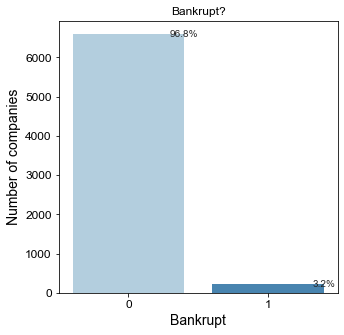

In [9]:
# We are checking for imbalanced data
# Print figure

import seaborn as sns

plt.figure(figsize=(5,5))
splot = sns.countplot(data = df,x = 'Bankrupt?',palette = 'Blues')
sns.set_style('ticks')
total = float(len(df))
for p in splot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    splot.annotate(percentage, (x,y), ha = 'center', va = 'center')
plt.title("Bankrupt?")
plt.xlabel("Bankrupt")
plt.ylabel("Number of companies")

In [10]:
# We are going to work later on on this issue.

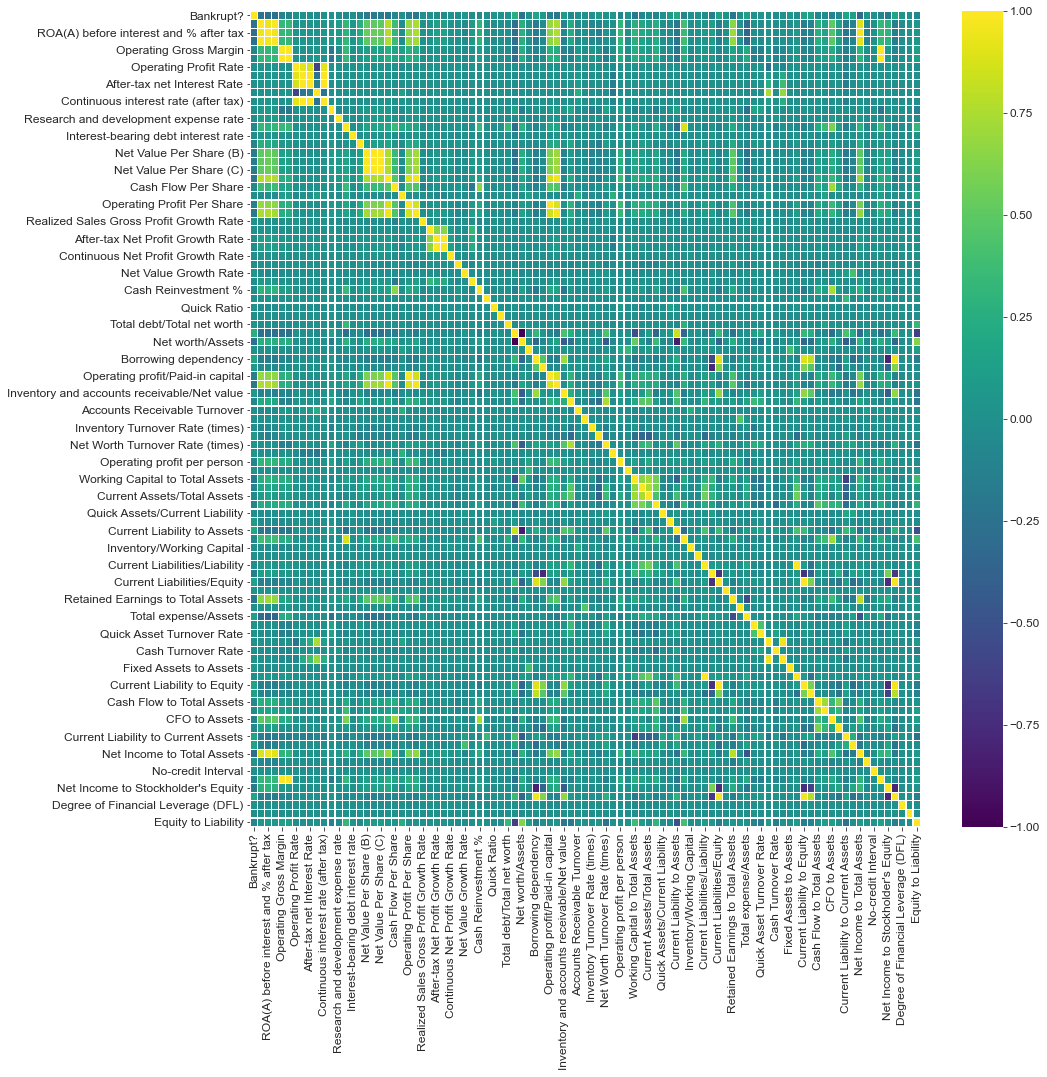

In [11]:
# Correlation

corr = df.corr()
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, ax = ax, cmap = 'viridis', linewidth = 0.1)

In [12]:
# Variable creation
X = df.drop(['Bankrupt?'], axis=1)
y = df['Bankrupt?']

In [13]:
X.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.370594         
1                                           0.464291         
2                                           0.426071         
3                                           0.399844         
4                                           0.465022         

   ROA(A) before interest and % after tax  \
0                                0.424389   
1                                0.538214   
2                                0.499019   
3                                0.451265   
4                                0.538432   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                           0.405750                0.601457   
1                                           0.516730                0.610235   
2                                           0.472295                0.601450   
3                                           0.457733                0.583541   
4                                           0.522298                0.598783   

   Realized Sales Gross Margin  Operating Profit Rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   
2                     0.601364               0.998857   
3                     0.583541               0.998700   
4                     0.598783               0.998973   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                   0.796887                     0.808809   
1                   0.797380                     0.809301   
2                   0.796403                     0.808388   
3                   0.796967                     0.808966   
4                   0.797366                     0.809304   

   Non-industry income and expenditure/revenue  \
0                                     0.302646   
1                                     0.303556   
2                                     0.302035   
3                                     0.303350   
4                                     0.303475   

   Continuous interest rate (after tax)  Operating Expense Rate  \
0                              0.780985            1.256970e-04   
1                              0.781506            2.897850e-04   
2                              0.780284            2.361300e-04   
3                              0.781241            1.078890e-04   
4                              0.781550            7.890000e+09   

   Research and development expense rate  Cash flow rate  \
0                                    0.0        0.458143   
1                                    0.0        0.461867   
2                             25500000.0        0.458521   
3                                    0.0        0.465705   
4                                    0.0        0.462746   

   Interest-bearing debt interest rate  Tax rate (A)  Net Value Per Share (B)  \
0                             0.000725           0.0                 0.147950   
1                             0.000647           0.0                 0.182251   
2                             0.000790           0.0                 0.177911   
3                             0.000449           0.0                 0.154187   
4                             0.000686           0.0                 0.167502   

   Net Value Per Share (A)  Net Value Per Share (C)  \
0                 0.147950                 0.147950   
1                 0.182251                 0.182251   
2                 0.177911                 0.193713   
3                 0.154187                 0.154187   
4                 0.167502                 0.167502   

   Persistent EPS in the Last Four Seasons  Cash Flow Per Share  \
0                                 0.169141             0.311664   
1                                 0.208944             0.318137   
2                                 0.180581             0.307102   
3                

In [14]:
#display(X.shape)
#display(y.shape)

(6819, 94)

(6819,)

## Preparing Data for ML models
*Splitting the data*

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test_final, y_train, y_test_final = train_test_split(X,y, test_size=0.2, random_state=42)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.25, random_state=42)

In [17]:
X_train.shape

(4091, 94)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([('std_scaler', StandardScaler())])

num_attribs = list(X_train)

full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs)])

In [19]:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)
X_test_final_prepared = full_pipeline.transform(X_test_final)

In [20]:
X_train_prepared = pd.DataFrame(X_train_prepared, columns=num_attribs)
X_test_prepared = pd.DataFrame(X_test_prepared, columns=num_attribs)
X_test_final_prepared = pd.DataFrame(X_test_final_prepared, columns=num_attribs)

In [21]:
'''
#Scaling
from sklearn.preprocessing import StandardScaler
x_col = X.columns
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)
X.columns = x_col
#X.apply(pd.to_numeric)
display(X.head())
'''

'\n#Scaling\nfrom sklearn.preprocessing import StandardScaler\nx_col = X.columns\nscaler = StandardScaler()\nx_scaled = scaler.fit_transform(X)\nX = pd.DataFrame(x_scaled)\nX.columns = x_col\n#X.apply(pd.to_numeric)\ndisplay(X.head())\n'

In [22]:
#display(X_train.shape)
#display(y_train.shape)

(4091, 94)

(4091,)

In [23]:
count = 0
for i in y_train:
    if i == 1:
        count +=1
print("There are",count,"cases of bankruptcy and",len(y_train)-count,"of non-bankruptcy")

There are 128 cases of bankruptcy and 3963 of non-bankruptcy


In [24]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [25]:
y_train.reset_index(inplace=True)
y_train.drop(columns='index',axis=1,inplace=True)
y_test.reset_index(inplace=True)
y_test.drop(columns='index',inplace=True)
y_train.head()

Bankrupt?
0          0
1          0
2          0
3          0
4          0

### Base Model

In [26]:
# Find some classification models and check their baseline accuracy with 10 CV folds

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve



def get_model():
    models = []
    models.append(('LR' , LogisticRegression()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVM', SVC()))
    models.append(('GBC', GradientBoostingClassifier()))
    models.append(('RF' , RandomForestClassifier(n_estimators=100)))
    models.append(('MLP', MLPClassifier()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('ADABoost' , AdaBoostClassifier()))
    models.append(('XGB' , xgb.XGBClassifier()))
    models.append(('LightGBM' , lgb.LGBMClassifier()))
    return models

def bl_performance(X_train, y_train,models):
    plt.figure(figsize=(20,8))
    plt.title('ROC Curve', fontsize=14)
    results = []
    names = []
    acc = []
    f1 = []
    recall = []
    precision = []
    for name, model in models:
        kfold = KFold(n_splits=5)
        cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=['accuracy','f1','recall','precision'])
        print(cv_results)
        results.append(cv_results)
        names.append(name)
        print('{}: CV accuracy mean: {:.4}'.format(name, cv_results['test_accuracy'].mean()))
        print('{}: CV F1 score mean: {:.4}'.format(name, cv_results['test_f1'].mean()))
        print('{}: CV Recall score mean: {:.4}'.format(name, cv_results['test_recall'].mean()))
        print('{}: CV Precision score mean: {:.4}'.format(name, cv_results['test_precision'].mean()))
        acc += [cv_results['test_accuracy'].mean()]
        f1 += [cv_results['test_f1'].mean()]
        recall += [cv_results['test_recall'].mean()]
        precision += [cv_results['test_precision'].mean()]
        
        model.fit(X_train_prepared,y_train)
        y_pred = model.predict(X_test_prepared)
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        
        
        plt.plot(fpr, tpr, label='{} Classifier Score: {:.4f}'.format(name,roc_auc_score(y_test, y_pred)))
        
        
        
    result_df = pd.DataFrame()
    result_df['Model'] = ['LR','KNN','SVM','GBC','RF','MLP','LDA','ADABoost','XGB','LightGBM']
    result_df['Accuracy'] = acc
    result_df['F1'] = f1
    result_df['Recall'] = recall
    result_df['Precision'] = precision
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
        
    return names, results, result_df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

{'fit_time': array([0.123945  , 0.10271287, 0.13382363, 0.11758542, 0.1227572 ]), 'score_time': array([0.01200151, 0.01299667, 0.01382875, 0.01572919, 0.0143311 ]), 'test_accuracy': array([0.96581197, 0.96210269, 0.9608802 , 0.97555012, 0.96577017]), 'test_f1': array([0.26315789, 0.34042553, 0.30434783, 0.375     , 0.17647059]), 'test_recall': array([0.22727273, 0.25806452, 0.25      , 0.28571429, 0.11538462]), 'test_precision': array([0.3125    , 0.5       , 0.38888889, 0.54545455, 0.375     ])}
LR: CV accuracy mean: 0.966
LR: CV F1 score mean: 0.2919
LR: CV Recall score mean: 0.2273
LR: CV Precision score mean: 0.4244


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

{'fit_time': array([0.01718616, 0.01404262, 0.01388812, 0.01404905, 0.01700592]), 'score_time': array([0.20114112, 0.18836689, 0.17781711, 0.1834352 , 0.22113705]), 'test_accuracy': array([0.97313797, 0.96577017, 0.9608802 , 0.97555012, 0.97066015]), 'test_f1': array([0.26666667, 0.17647059, 0.05882353, 0.28571429, 0.25      ]), 'test_recall': array([0.18181818, 0.09677419, 0.03571429, 0.19047619, 0.15384615]), 'test_precision': array([0.5       , 1.        , 0.16666667, 0.57142857, 0.66666667])}
KNN: CV accuracy mean: 0.9692
KNN: CV F1 score mean: 0.2075
KNN: CV Recall score mean: 0.1317
KNN: CV Precision score mean: 0.581


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

{'fit_time': array([0.30238795, 0.30304146, 0.28490901, 0.29813099, 0.29811978]), 'score_time': array([0.18781257, 0.15220928, 0.13880181, 0.1504364 , 0.14164186]), 'test_accuracy': array([0.97313797, 0.96210269, 0.96454768, 0.97432763, 0.96821516]), 'test_f1': array([0., 0., 0., 0., 0.]), 'test_recall': array([0., 0., 0., 0., 0.]), 'test_precision': array([0., 0., 0., 0., 0.])}
SVM: CV accuracy mean: 0.9685
SVM: CV F1 score mean: 0.0
SVM: CV Recall score mean: 0.0
SVM: CV Precision score mean: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

{'fit_time': array([13.61095381, 13.18696523, 13.75723529, 13.19880795, 13.306247  ]), 'score_time': array([0.0129962 , 0.01599908, 0.01724887, 0.01399875, 0.01365852]), 'test_accuracy': array([0.97557998, 0.9608802 , 0.9596577 , 0.97066015, 0.96332518]), 'test_f1': array([0.41176471, 0.33333333, 0.29787234, 0.36842105, 0.31818182]), 'test_recall': array([0.31818182, 0.25806452, 0.25      , 0.33333333, 0.26923077]), 'test_precision': array([0.58333333, 0.47058824, 0.36842105, 0.41176471, 0.38888889])}
GBC: CV accuracy mean: 0.966
GBC: CV F1 score mean: 0.3459
GBC: CV Recall score mean: 0.2858
GBC: CV Precision score mean: 0.4446


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was ex

{'fit_time': array([2.56112266, 2.47954464, 2.62624216, 2.55060077, 2.43696213]), 'score_time': array([0.04099989, 0.04288268, 0.04021955, 0.04596901, 0.04204464]), 'test_accuracy': array([0.97557998, 0.96454768, 0.96577017, 0.97188264, 0.96943765]), 'test_f1': array([0.375     , 0.21621622, 0.22222222, 0.20689655, 0.19354839]), 'test_recall': array([0.27272727, 0.12903226, 0.14285714, 0.14285714, 0.11538462]), 'test_precision': array([0.6       , 0.66666667, 0.5       , 0.375     , 0.6       ])}
RF: CV accuracy mean: 0.9694
RF: CV F1 score mean: 0.2428
RF: CV Recall score mean: 0.1606
RF: CV Precision score mean: 0.5483


<ipython-input-26-59f08d07b712>:60: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_prepared,y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kw

{'fit_time': array([7.82004213, 7.90780902, 7.82193851, 8.05861664, 8.01102662]), 'score_time': array([0.01398134, 0.01491618, 0.01782155, 0.01449871, 0.01797557]), 'test_accuracy': array([0.96703297, 0.96332518, 0.96332518, 0.96699267, 0.9608802 ]), 'test_f1': array([0.30769231, 0.44444444, 0.34782609, 0.34146341, 0.15789474]), 'test_recall': array([0.27272727, 0.38709677, 0.28571429, 0.33333333, 0.11538462]), 'test_precision': array([0.35294118, 0.52173913, 0.44444444, 0.35      , 0.25      ])}
MLP: CV accuracy mean: 0.9643
MLP: CV F1 score mean: 0.3199
MLP: CV Recall score mean: 0.2789
MLP: CV Precision score mean: 0.3838


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

{'fit_time': array([0.18380547, 0.15842414, 0.14168096, 0.15830779, 0.15331507]), 'score_time': array([0.0120182 , 0.01294565, 0.01000071, 0.01201916, 0.01201344]), 'test_accuracy': array([0.96947497, 0.95232274, 0.95843521, 0.9596577 , 0.95476773]), 'test_f1': array([0.48979592, 0.38095238, 0.34615385, 0.19512195, 0.17777778]), 'test_recall': array([0.54545455, 0.38709677, 0.32142857, 0.19047619, 0.15384615]), 'test_precision': array([0.44444444, 0.375     , 0.375     , 0.2       , 0.21052632])}
LDA: CV accuracy mean: 0.9589
LDA: CV F1 score mean: 0.318
LDA: CV Recall score mean: 0.3197
LDA: CV Precision score mean: 0.321


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

{'fit_time': array([2.79556298, 2.78180099, 2.7765801 , 2.78504229, 2.80269909]), 'score_time': array([0.04199243, 0.04100156, 0.04299903, 0.04197955, 0.05478621]), 'test_accuracy': array([0.96703297, 0.95843521, 0.95599022, 0.96943765, 0.96577017]), 'test_f1': array([0.4       , 0.22727273, 0.25      , 0.19354839, 0.26315789]), 'test_recall': array([0.40909091, 0.16129032, 0.21428571, 0.14285714, 0.19230769]), 'test_precision': array([0.39130435, 0.38461538, 0.3       , 0.3       , 0.41666667])}
ADABoost: CV accuracy mean: 0.9633
ADABoost: CV F1 score mean: 0.2668
ADABoost: CV Recall score mean: 0.224
ADABoost: CV Precision score mean: 0.3585


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[02:28:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[02:28:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[02:28:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[02:28:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[02:28:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'fit_time': array([1.31168103, 1.1264925 , 1.1600399 , 1.21627069, 1.17193079]), 'score_time': array([0.01746082, 0.01700258, 0.01859879, 0.02006888, 0.01746273]), 'test_accuracy': array([0.97313797, 0.97188264, 0.96821516, 0.97555012, 0.96454768]), 'test_f1': array([0.26666667, 0.46511628, 0.31578947, 0.33333333, 0.29268293]), 'test_recall': array([0.18181818, 0.32258065, 0.21428571, 0.23809524, 0.23076923]), 'test_precision': array([0.5       , 0.83333333, 0.6       , 0.55555556, 0.4       ])}
XGB: CV accuracy mean: 0.9707
XGB: CV F1 score mean: 0.3347
XGB: CV Recall score mean: 0.2375
XGB: CV Precision score mean: 0.5778
[02:28:12] WARNING: C:/Users/Administrator/workspace/xgbo

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramDa

{'fit_time': array([0.78123736, 0.72970986, 0.78717923, 0.59414768, 0.66639376]), 'score_time': array([0.0182662 , 0.01774669, 0.02005053, 0.01979446, 0.01810861]), 'test_accuracy': array([0.97802198, 0.96943765, 0.96943765, 0.97188264, 0.96699267]), 'test_f1': array([0.4       , 0.41860465, 0.32432432, 0.20689655, 0.27027027]), 'test_recall': array([0.27272727, 0.29032258, 0.21428571, 0.14285714, 0.19230769]), 'test_precision': array([0.75      , 0.75      , 0.66666667, 0.375     , 0.45454545])}
LightGBM: CV accuracy mean: 0.9712
LightGBM: CV F1 score mean: 0.324
LightGBM: CV Recall score mean: 0.2225
LightGBM: CV Precision score mean: 0.5992


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


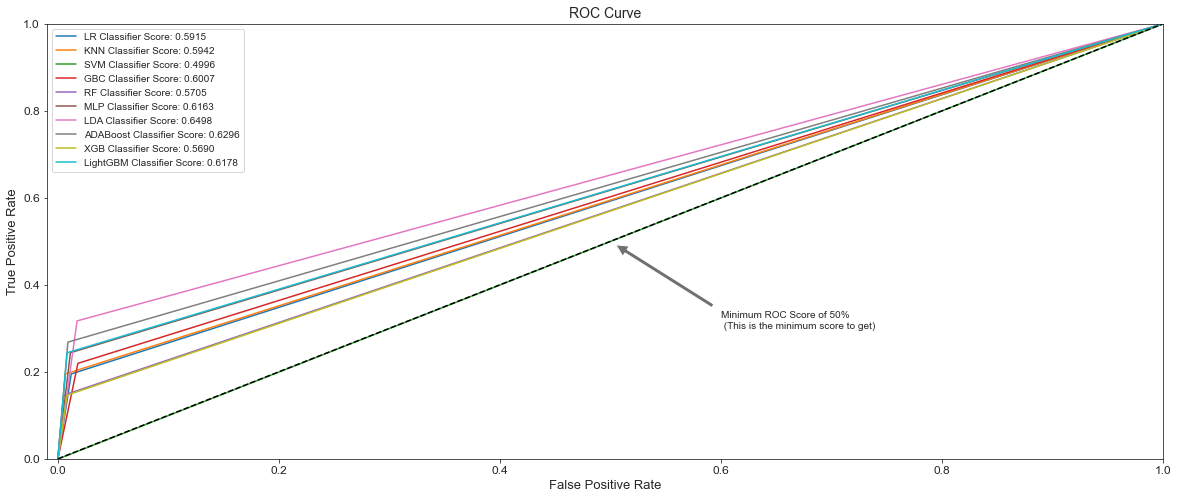

In [27]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

models = get_model()
names,results,result_df= bl_performance(X_train_prepared, y_train,models)

result_df.sort_values(by='F1',ascending=False,inplace=True)

In [28]:
result_df

Model  Accuracy        F1    Recall  Precision
3       GBC  0.966021  0.345915  0.285762   0.444599
8       XGB  0.970667  0.334718  0.237510   0.577778
9  LightGBM  0.971155  0.324019  0.222500   0.599242
5       MLP  0.964311  0.319864  0.278851   0.383825
6       LDA  0.958932  0.317960  0.319660   0.320994
0        LR  0.966023  0.291880  0.227287   0.424369
7  ADABoost  0.963333  0.266796  0.223966   0.358517
4        RF  0.969444  0.242777  0.160572   0.548333
1       KNN  0.969200  0.207535  0.131726   0.580952
2       SVM  0.968466  0.000000  0.000000   0.000000

In [29]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(result_df, x="Model", y=['Accuracy','F1','Recall','Precision'], barmode='group',
             height=400)

fig.update_yaxes(title_text="Model Metrics")
fig.update_layout(
    title_text="Model Performance"
)
fig.show()

## Feature Selection, resampling and data transformation

In [30]:
#Anomaly Detection
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(n_estimators=100,contamination=0.01)
pred = iforest.fit_predict(X_train_prepared)
score = iforest.decision_function(X_train_prepared)
from numpy import where
anom_index = where(pred==-1)
values = X.iloc[anom_index]

for i in values.index:
    X_train_prepared = X_train_prepared.drop(i)
    y_train = y_train.drop(i)

In [31]:
ctr = len(values)
print("Number of observations dropped = {}".format(ctr))

Number of observations dropped = 41


In [32]:
# Modelling with balanced target 

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_prepared, y_train)

sel = SelectFromModel(model)
sel.fit(X_test_prepared, y_test)

selected_feat= X_train.columns[(sel.get_support())]

<ipython-input-32-71410028bc11>:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_from_model.py:234: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [33]:
# Dealing with imbalanced data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy = 0.2)
under = RandomUnderSampler(sampling_strategy = 0.6)

steps = [('o',over),('u',under)]
pipeline = Pipeline(steps = steps)

#X_train_prepared, y_train = pipeline.fit_resample(X_train_prepared, y_train)
over_sample=SMOTE()
X_train_prepared, y_train=over_sample.fit_resample(X_train_prepared,y_train)

In [34]:
display(X_train_prepared.shape)
display(y_train.shape)

(7866, 94)

(7866, 1)

Text(0, 0.5, 'Number of companies')

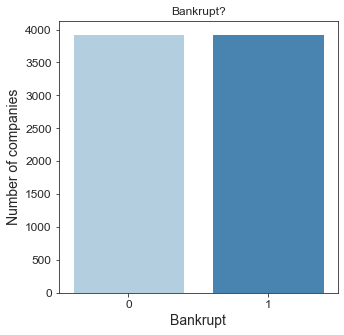

In [35]:
plt.figure(figsize=(5,5))
splot = sns.countplot(data = y_train, x = 'Bankrupt?', palette = 'Blues')
sns.set_style('ticks')
total = float(len(df))
plt.title("Bankrupt?")
plt.xlabel("Bankrupt")
plt.ylabel("Number of companies")

### Dropping highly correlated columns (greater than 0.85)

In [36]:
import rfpimp
from rfpimp import plot_corr_heatmap
limit = 0.85
corr = X_train_prepared.corr()

In [37]:
mask = np.triu(np.ones(corr.shape), k=1).astype(bool)
corr_no_diag = corr.where(mask)

In [38]:
corr_no_diag

ROA(C) before interest and depreciation before interest  \
ROA(C) before interest and depreciation before ...                                                NaN         
ROA(A) before interest and % after tax                                                            NaN         
ROA(B) before interest and depreciation after tax                                                 NaN         
Operating Gross Margin                                                                            NaN         
Realized Sales Gross Margin                                                                       NaN         
Operating Profit Rate                                                                             NaN         
Pre-tax net Interest Rate                                                                         NaN         
After-tax net Interest Rate                                                                       NaN         
Non-industry income and expenditure/revenue                                                       NaN         
Continuous interest rate (after tax)                                                              NaN         
Operating Expense Rate                                                                            NaN         
Research and development expense rate                                                             NaN         
Cash flow rate                                                                                    NaN         
Interest-bearing debt interest rate                                                               NaN         
Tax rate (A)                                                                                      NaN         
Net Value Per Share (B)                                                                           NaN         
Net Value Per Share (A)                                                                           NaN         
Net Value Per Share (C)                                                                           NaN         
Persistent EPS in the Last Four Seasons                                                           NaN         
Cash Flow Per Share                                                                               NaN         
Revenue Per Share (Yuan ¥)                                                                        NaN         
Operating Profit Per Share                                                                        NaN         
Per Share Net profit before tax                                                                   NaN         
Realized Sales Gross Profit Growth Rate                                                           NaN         
Operating Profit Growth Rate                                                                      NaN         
After-tax Net Profit Growth Rate                                                                  NaN         
Regular Net Profit Growth Rate                                                                    NaN         
Continuous Net Profit Growth Rate                                                                 NaN         
Total Asset Growth Rate                                                                           NaN         
Net Value Growth Rate                                                                             NaN         
Total Asset Return Growth Rate Ratio                                                              NaN         
Cash Reinvestment %                                                                               NaN         
Current Ratio                                                                                     NaN         
Quick Ratio                                                                                       NaN         
Interest Expense Ratio                                                                            NaN         
Total debt/Total net worth                              

In [39]:
coll = [c for c in corr_no_diag.columns if any(abs(corr_no_diag[c]) > limit)]

In [40]:
## Highly corelated columns
coll

['ROA(A) before interest and % after tax',
 'ROA(B) before interest and depreciation after tax',
 'Realized Sales Gross Margin',
 'Pre-tax net Interest Rate',
 'After-tax net Interest Rate',
 'Continuous interest rate (after tax)',
 'Net Value Per Share (A)',
 'Net Value Per Share (C)',
 'Persistent EPS in the Last Four Seasons',
 'Operating Profit Per Share',
 'Per Share Net profit before tax',
 'Regular Net Profit Growth Rate',
 'Net Value Growth Rate',
 'Net worth/Assets',
 'Operating profit/Paid-in capital',
 'Net profit before tax/Paid-in capital',
 'Operating Funds to Liability',
 'Working Capital/Equity',
 'Current Liabilities/Equity',
 'Cash Flow to Sales',
 'Current Liability to Liability',
 'Current Liability to Equity',
 'CFO to Assets',
 'Cash Flow to Equity',
 'Net Income to Total Assets',
 'Gross Profit to Sales',
 "Net Income to Stockholder's Equity",
 'Liability to Equity']

### Variance threshold

In [41]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

sel.fit(X_train_prepared)
var = sel.get_support()

col2 = []
for i in range(94):
    if not var[i]:
        col2.append(num_attribs[i])

In [42]:
col2

['Revenue Per Share (Yuan ¥)',
 'Net Value Growth Rate',
 'Contingent liabilities/Net worth',
 'Revenue per person',
 'Quick Assets/Current Liability',
 'Working Capital/Equity',
 "Net Income to Stockholder's Equity"]

In [43]:
## Highly corelated columns with variance > 0.16
col_del = coll.copy()
for i in coll:
    if i not in col2:
        col_del.append(i)
col_del

['ROA(A) before interest and % after tax',
 'ROA(B) before interest and depreciation after tax',
 'Realized Sales Gross Margin',
 'Pre-tax net Interest Rate',
 'After-tax net Interest Rate',
 'Continuous interest rate (after tax)',
 'Net Value Per Share (A)',
 'Net Value Per Share (C)',
 'Persistent EPS in the Last Four Seasons',
 'Operating Profit Per Share',
 'Per Share Net profit before tax',
 'Regular Net Profit Growth Rate',
 'Net Value Growth Rate',
 'Net worth/Assets',
 'Operating profit/Paid-in capital',
 'Net profit before tax/Paid-in capital',
 'Operating Funds to Liability',
 'Working Capital/Equity',
 'Current Liabilities/Equity',
 'Cash Flow to Sales',
 'Current Liability to Liability',
 'Current Liability to Equity',
 'CFO to Assets',
 'Cash Flow to Equity',
 'Net Income to Total Assets',
 'Gross Profit to Sales',
 "Net Income to Stockholder's Equity",
 'Liability to Equity',
 'ROA(A) before interest and % after tax',
 'ROA(B) before interest and depreciation after tax',


In [44]:
## 31 columns removed
X_train_prepared_old = X_train_prepared.copy()
X_train_prepared.drop(columns=col_del,axis=1,inplace=True)

In [45]:
X_train_prepared.shape

(7866, 66)

In [46]:
'''
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return(dataset)

filtered_col = correlation(df, 0.65).columns
df = df[filtered_col]
df
correlation(df, 0.65)
'''

'\ndef correlation(dataset, threshold):\n    col_corr = set() # Set of all the names of deleted columns\n    corr_matrix = dataset.corr()\n    for i in range(len(corr_matrix.columns)):\n        for j in range(i):\n            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):\n                colname = corr_matrix.columns[i] # getting the name of column\n                col_corr.add(colname)\n                if colname in dataset.columns:\n                    del dataset[colname] # deleting the column from the dataset\n\n    return(dataset)\n\nfiltered_col = correlation(df, 0.65).columns\ndf = df[filtered_col]\ndf\ncorrelation(df, 0.65)\n'

### Tree-Based Feature Selection

<ipython-input-47-8f460d29d20f>:9: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



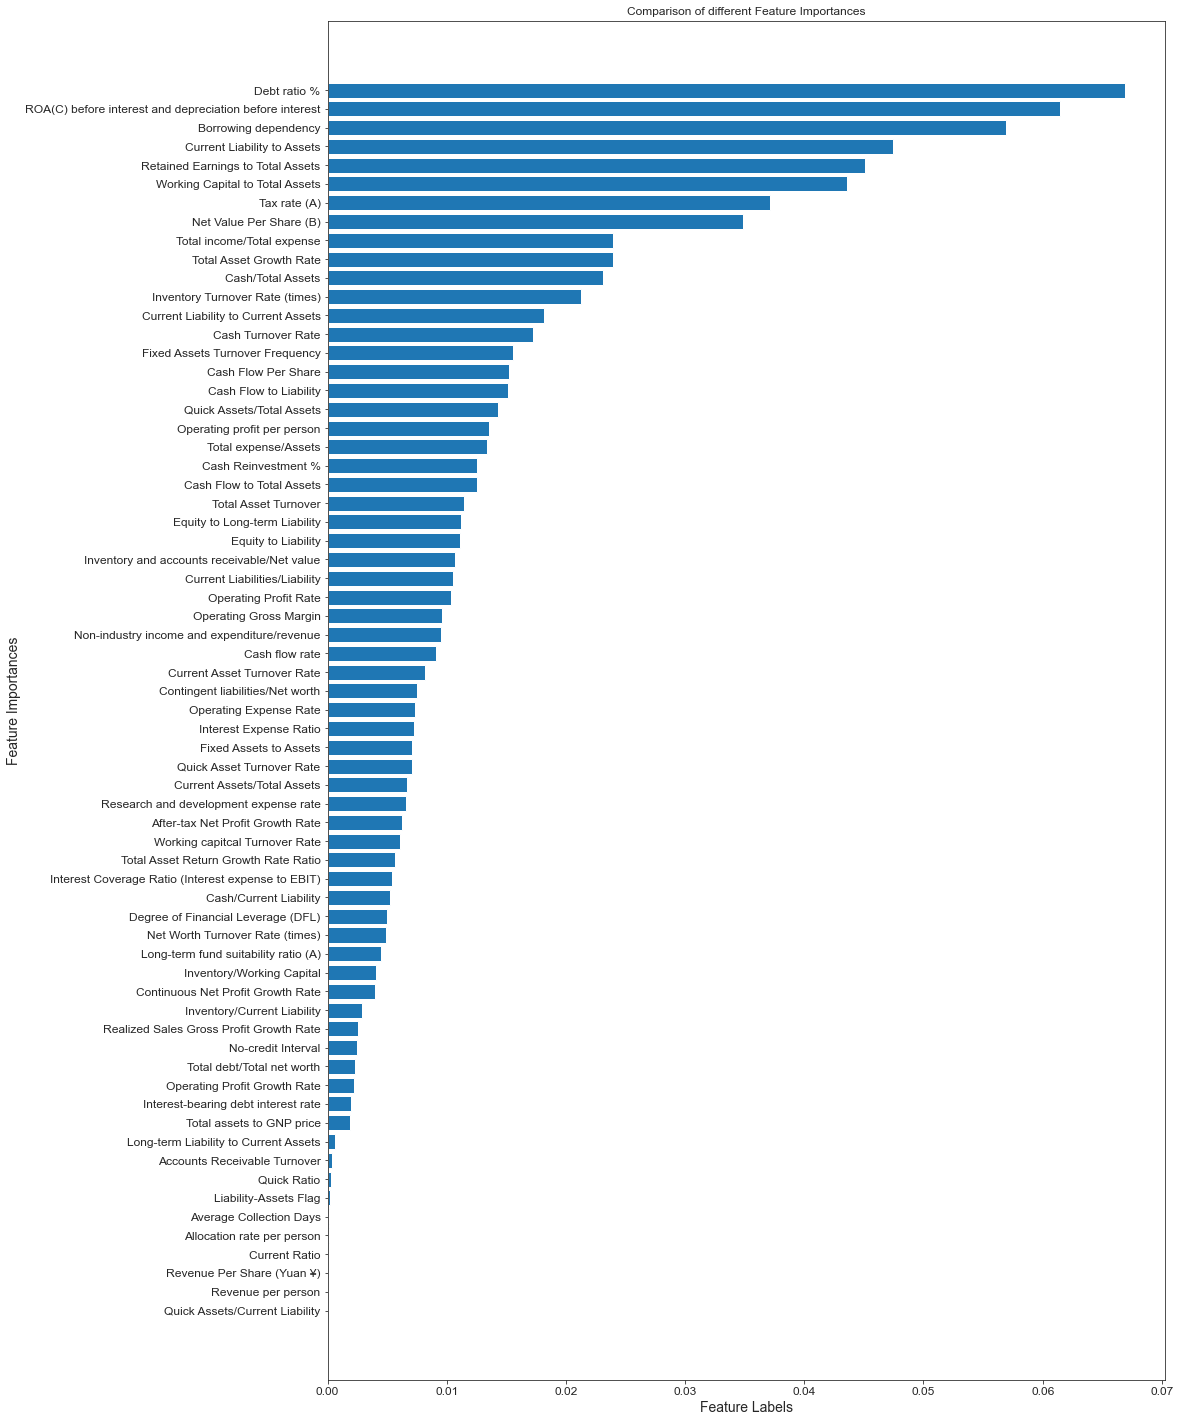

In [47]:
# feature selection (tree-based)

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

clf = ExtraTreesClassifier(n_estimators=50, random_state=45)
clf = clf.fit(X_train_prepared, y_train)
feature_importance = clf.feature_importances_
  
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        clf.estimators_], 
                                        axis = 0) 

tbfs = pd.DataFrame(
    {"X": X_train_prepared.columns, "FI": feature_importance_normalized}
)

tbfs = tbfs.sort_values('FI',ascending=True)


# Plotting a Bar Graph to compare the models 
plt.figure(figsize=(15,25))
plt.barh(y=tbfs['X'],width=tbfs['FI']) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show()


### Recursive Feature Elimination

In [48]:
from sklearn.feature_selection import RFE
from sklearn import ensemble
from yellowbrick.features import RFECV

## RFE

rf = RandomForestClassifier(random_state=42)
model = RFE(rf, n_features_to_select=50)
fit_model = model.fit(X_train_prepared, y_train)
features = pd.DataFrame(list(zip(X_train_prepared.columns,fit_model.ranking_)), columns = ['predictor','ranking'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\s

In [49]:
features = features.sort_values(by = 'ranking')

In [50]:
## RFE and Tree based feature importance signify that features with rank greater than 3 in RFE are insignificant
chosen_features = features[features['ranking']<3]

In [51]:
chosen_features.shape

(51, 2)

### Sequential Feature Selection

In [52]:
'''
import datetime
from datetime import *
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import Lasso

rf = RandomForestClassifier()

## Forward SFE

now = datetime.now()
sfs_forward = SequentialFeatureSelector(rf,n_features_to_select=10,direction='forward').fit(X_train_prepared, y_train)
print("Forward Sequential Feature Selection done in {}".format(datetime.now()-now))

## Backward SFE
now = datetime.now()
sfs_backward = SequentialFeatureSelector(rf,direction='backward').fit(X_train_prepared, y_train)
print("Backward Sequential Feature Selection done in {}".format(datetime.now()-now))

bool = sfs_forward.get_support()

chosen_features.reset_index(inplace=True)
chosen_features.drop(columns='index',axis=1,inplace=True)
chosen_features.shape

## chosen features from forward sequential feature selection
fwd_features = []
for i in range(51):
    if bool[i]:
        fwd_features.append(chosen_features['predictor'][i])
fwd_features
sfs_backward.get_support()


X_train_prepared_small = X_train_prepared[fwd_features]
X_test_prepared_small = X_test_prepared[fwd_features]
'''

'\nimport datetime\nfrom datetime import *\nfrom sklearn.feature_selection import SequentialFeatureSelector\nfrom sklearn.linear_model import Lasso\n\nrf = RandomForestClassifier()\n\n## Forward SFE\n\nnow = datetime.now()\nsfs_forward = SequentialFeatureSelector(rf,n_features_to_select=10,direction=\'forward\').fit(X_train_prepared, y_train)\nprint("Forward Sequential Feature Selection done in {}".format(datetime.now()-now))\n\n## Backward SFE\nnow = datetime.now()\nsfs_backward = SequentialFeatureSelector(rf,direction=\'backward\').fit(X_train_prepared, y_train)\nprint("Backward Sequential Feature Selection done in {}".format(datetime.now()-now))\n\nbool = sfs_forward.get_support()\n\nchosen_features.reset_index(inplace=True)\nchosen_features.drop(columns=\'index\',axis=1,inplace=True)\nchosen_features.shape\n\n## chosen features from forward sequential feature selection\nfwd_features = []\nfor i in range(51):\n    if bool[i]:\n        fwd_features.append(chosen_features[\'predictor\

#### Selected Features

In [53]:
chosen_features

predictor  ranking
0   ROA(C) before interest and depreciation before...        1
64  Interest Coverage Ratio (Interest expense to E...        1
33                    Net Worth Turnover Rate (times)        1
35                        Operating profit per person        1
37                    Working Capital to Total Assets        1
38                          Quick Assets/Total Assets        1
39                        Current Assets/Total Assets        1
40                                  Cash/Total Assets        1
43                        Current Liability to Assets        1
44                          Inventory/Working Capital        1
46                      Current Liabilities/Liability        1
48                  Retained Earnings to Total Assets        1
31                    Inventory Turnover Rate (times)        1
49                         Total income/Total expense        1
51                        Current Asset Turnover Rate        1
52                          Quick Asset Turnover Rate        1
53                     Working capitcal Turnover Rate        1
54                                 Cash Turnover Rate        1
55                             Fixed Assets to Assets        1
56                      Equity to Long-term Liability        1
57                          Cash Flow to Total Assets        1
58                             Cash Flow to Liability        1
59                Current Liability to Current Assets        1
62                                 No-credit Interval        1
63                 Degree of Financial Leverage (DFL)        1
50                               Total expense/Assets        1
28                               Total Asset Turnover        1
65                                Equity to Liability        1
26                   Contingent liabilities/Net worth        1
1                              Operating Gross Margin        1
2                               Operating Profit Rate        1
3         Non-industry income and expenditure/revenue        1
4                              Operating Expense Rate        1
5               Research and development expense rate        1
6                                      Cash flow rate        1
8                                        Tax rate (A)        1
9                             Net Value Per Share (B)        1
10                                Cash Flow Per Share        1
12            Realized Sales Gross Profit Growth Rate        1
13                       Operating Profit Growth Rate        1
14                   After-tax Net Profit Growth Rate        1
27        Inventory and accounts receivable/Net value        1
16                            Total Asset Growth Rate        1
15                  Continuous Net Profit Growth Rate        1
25                               Borrowing dependency        1
24               Long-term fund suitability ratio (A)        1
18                                Cash Reinvestment %        1
23                                       Debt ratio %        1
17               Total Asset Return Growth Rate Ratio        1
21                             Interest Expense Ratio        1
32                    Fixed Assets Turnover Frequency        2

In [54]:
## Training and test set with selected features
X_train_prepared = X_train_prepared[chosen_features['predictor']]
X_test_prepared = X_test_prepared[chosen_features['predictor']]
X_test_final_prepared = X_test_final_prepared[chosen_features['predictor']]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([0.16849279, 0.17644691, 0.13614798, 0.16134953, 0.12436056]), 'score_time': array([0.01901436, 0.01299524, 0.011971  , 0.0120213 , 0.01432133]), 'test_accuracy': array([0.85768742, 0.85505404, 0.8862047 , 0.87666879, 0.86713287]), 'test_f1': array([0.27741935, 0.24      , 0.87731323, 0.93428184, 0.92883895]), 'test_recall': array([0.91489362, 0.9       , 0.91428571, 0.87666879, 0.86713287]), 'test_precision': array([0.1634981 , 0.13846154, 0.84321476, 1.        , 1.        ])}
LR: CV accuracy mean: 0.8685
LR: CV F1 score mean: 0.6516
LR: CV Recall score mean: 0.8946
LR: CV Precision score mean: 0.629


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\sit

{'fit_time': array([0.01404977, 0.0109992 , 0.01096201, 0.01091671, 0.01299953]), 'score_time': array([0.50591373, 0.46827841, 0.42968154, 0.4344244 , 0.47677493]), 'test_accuracy': array([0.85578145, 0.86840432, 0.92689129, 1.        , 1.        ]), 'test_f1': array([0.29283489, 0.27874564, 0.92409241, 1.        , 1.        ]), 'test_recall': array([1., 1., 1., 1., 1.]), 'test_precision': array([0.17153285, 0.16194332, 0.85889571, 1.        , 1.        ])}
KNN: CV accuracy mean: 0.9302
KNN: CV F1 score mean: 0.6991
KNN: CV Recall score mean: 1.0
KNN: CV Precision score mean: 0.6385


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\va

{'fit_time': array([1.20057917, 1.25322342, 1.30405474, 1.32168412, 1.35020041]), 'score_time': array([0.49754262, 0.51398396, 0.54583097, 0.63877749, 0.60044217]), 'test_accuracy': array([0.92121982, 0.93197711, 0.95867769, 0.99364272, 0.98347107]), 'test_f1': array([0.43119266, 0.42780749, 0.95526497, 0.99681122, 0.99166667]), 'test_recall': array([1.        , 1.        , 0.99142857, 0.99364272, 0.98347107]), 'test_precision': array([0.2748538 , 0.27210884, 0.92164675, 1.        , 1.        ])}
SVM: CV accuracy mean: 0.9578
SVM: CV F1 score mean: 0.7605
SVM: CV Recall score mean: 0.9937
SVM: CV Precision score mean: 0.6937


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([17.6545341 , 17.55965161, 18.5681417 , 17.06396818, 17.2313261 ]), 'score_time': array([0.01852131, 0.01803875, 0.02106214, 0.01692867, 0.01695204]), 'test_accuracy': array([0.93202033, 0.93769866, 0.95486332, 0.9841068 , 0.97075652]), 'test_f1': array([0.44559585, 0.43023256, 0.95072866, 0.99198975, 0.98516129]), 'test_recall': array([0.91489362, 0.925     , 0.97857143, 0.9841068 , 0.97075652]), 'test_precision': array([0.29452055, 0.28030303, 0.92442645, 1.        , 1.        ])}
GBC: CV accuracy mean: 0.9559
GBC: CV F1 score mean: 0.7607
GBC: CV Recall score mean: 0.9547
GBC: CV Precision score mean: 0.6999


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-p

{'fit_time': array([7.17214203, 7.54131937, 6.48248649, 5.48590326, 5.37657905]), 'score_time': array([0.07789779, 0.05610538, 0.06440377, 0.06899166, 0.06457686]), 'test_accuracy': array([0.96378653, 0.96376351, 0.97902098, 0.99427845, 0.99491418]), 'test_f1': array([0.62251656, 0.58394161, 0.97684211, 0.99713102, 0.99745061]), 'test_recall': array([1.        , 1.        , 0.99428571, 0.99427845, 0.99491418]), 'test_precision': array([0.45192308, 0.41237113, 0.96      , 1.        , 1.        ])}
RF: CV accuracy mean: 0.9792
RF: CV F1 score mean: 0.8356
RF: CV Recall score mean: 0.9967
RF: CV Precision score mean: 0.7649


<ipython-input-26-59f08d07b712>:60: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-

{'fit_time': array([11.24774384, 10.98222136, 11.05225277, 10.73449373,  9.42438412]), 'score_time': array([0.01499534, 0.01731682, 0.0170424 , 0.01306391, 0.01646614]), 'test_accuracy': array([0.9707751 , 0.97457088, 0.98537826, 1.        , 1.        ]), 'test_f1': array([0.67142857, 0.66666667, 0.98383696, 1.        , 1.        ]), 'test_recall': array([1., 1., 1., 1., 1.]), 'test_precision': array([0.50537634, 0.5       , 0.96818811, 1.        , 1.        ])}
MLP: CV accuracy mean: 0.9861
MLP: CV F1 score mean: 0.8644
MLP: CV Recall score mean: 1.0
MLP: CV Precision score mean: 0.7947


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([0.14019346, 0.12271476, 0.12714553, 0.13199806, 0.129004  ]), 'score_time': array([0.01300025, 0.01293135, 0.01294756, 0.01771998, 0.01287103]), 'test_accuracy': array([0.83163914, 0.83852511, 0.87158296, 0.85632549, 0.8518754 ]), 'test_f1': array([0.24501425, 0.21604938, 0.86126374, 0.92260274, 0.92001373]), 'test_recall': array([0.91489362, 0.875     , 0.89571429, 0.85632549, 0.8518754 ]), 'test_precision': array([0.14144737, 0.12323944, 0.82936508, 1.        , 1.        ])}
LDA: CV accuracy mean: 0.85
LDA: CV F1 score mean: 0.633
LDA: CV Recall score mean: 0.8788
LDA: CV Precision score mean: 0.6188


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([3.6848104 , 3.669945  , 3.5842464 , 3.50247955, 3.52337646]), 'score_time': array([0.04999948, 0.0519979 , 0.05141258, 0.05226111, 0.04894805]), 'test_accuracy': array([0.91486658, 0.91417673, 0.93897012, 0.94151303, 0.93515575]), 'test_f1': array([0.37383178, 0.30769231, 0.93258427, 0.96987557, 0.96649146]), 'test_recall': array([0.85106383, 0.75      , 0.94857143, 0.94151303, 0.93515575]), 'test_precision': array([0.23952096, 0.19354839, 0.91712707, 1.        , 1.        ])}
ADABoost: CV accuracy mean: 0.9289
ADABoost: CV F1 score mean: 0.7101
ADABoost: CV Recall score mean: 0.8853
ADABoost: CV Precision score mean: 0.67


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[02:35:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[02:35:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[02:35:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[02:35:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[02:35:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'fit_time': array([1.96573615, 1.98723316, 1.99870229, 2.00905204, 1.97197914]), 'score_time': array([0.01700354, 0.01699924, 0.01699829, 0.01699853, 0.01761031]), 'test_accuracy': array([0.9707751 , 0.97457088, 0.98792117, 0.99809282, 1.        ]), 'test_f1': array([0.66176471, 0.64285714, 0.98659139, 0.9990455 , 1.        ]), 'test_recall': array([0.95744681, 0.9       , 0.99857143, 0.99809282, 1.        ]), 'test_precision': array([0.50561798, 0.5       , 0.9748954 , 1.        , 1.        ])}
XGB: CV accuracy mean: 0.9863
XGB: CV F1 score mean: 0.8581
XGB: CV Recall score mean: 0.9708
XGB: CV Precision score mean: 0.7961
[02:35:25] WARNING: C:/Users/Administrator/workspace/xgbo

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was p

{'fit_time': array([0.45737815, 0.46777439, 0.45345449, 0.4834826 , 0.45683312]), 'score_time': array([0.01899981, 0.01900387, 0.02000022, 0.02000761, 0.0206902 ]), 'test_accuracy': array([0.97331639, 0.97139224, 0.98537826, 0.99872854, 0.99809282]), 'test_f1': array([0.68181818, 0.62809917, 0.98381422, 0.99936387, 0.9990455 ]), 'test_recall': array([0.95744681, 0.95      , 0.99857143, 0.99872854, 0.99809282]), 'test_precision': array([0.52941176, 0.4691358 , 0.96948682, 1.        , 1.        ])}
LightGBM: CV accuracy mean: 0.9854
LightGBM: CV F1 score mean: 0.8584
LightGBM: CV Recall score mean: 0.9806
LightGBM: CV Precision score mean: 0.7936


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



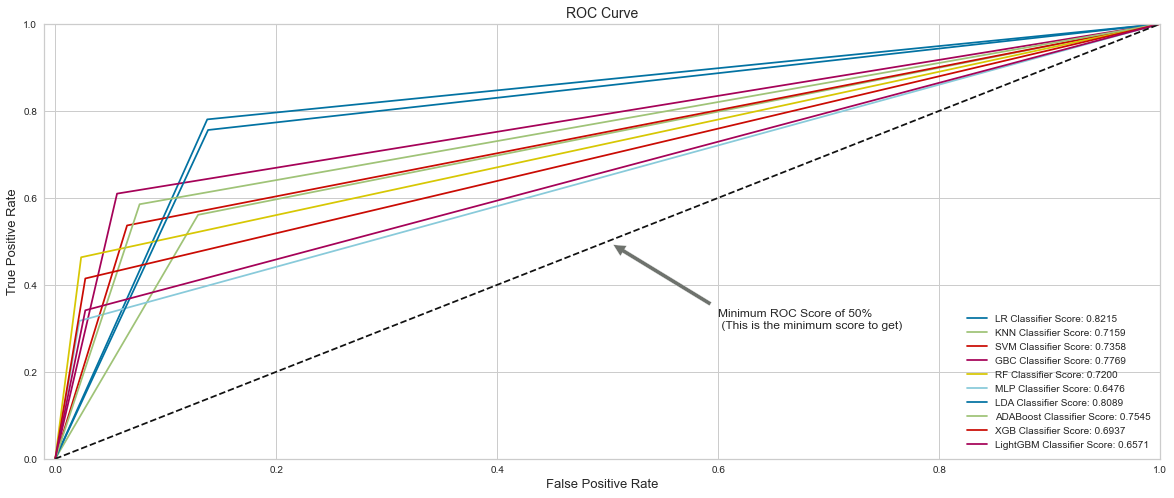

In [55]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

models = get_model()
names,results,result_df= bl_performance(X_train_prepared, y_train,models)

result_df.sort_values(by='F1',ascending=False,inplace=True)

In [56]:
result_df

Model  Accuracy        F1    Recall  Precision
5       MLP  0.986145  0.864386  1.000000   0.794713
9  LightGBM  0.985382  0.858428  0.980568   0.793607
8       XGB  0.986272  0.858052  0.970822   0.796103
4        RF  0.979153  0.835576  0.996696   0.764859
3       GBC  0.955889  0.760742  0.954666   0.699850
2       SVM  0.957798  0.760549  0.993708   0.693722
7  ADABoost  0.928936  0.710095  0.885261   0.670039
1       KNN  0.930215  0.699135  1.000000   0.638474
0        LR  0.868550  0.651571  0.894596   0.629035
6       LDA  0.849990  0.632989  0.878762   0.618810

In [57]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(result_df, x="Model", y=['Accuracy','F1','Recall','Precision'], barmode='group',
             height=400)

fig.update_yaxes(title_text="Model Metrics")
fig.update_layout(
    title_text="Model Performance"
)
fig.show()

## Dimensionality Reduction
### PCA

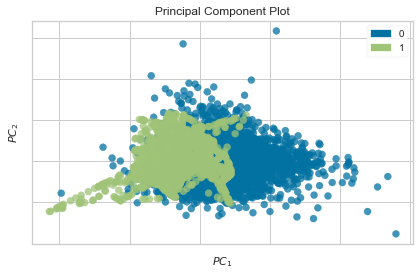

In [58]:
from yellowbrick.features.pca import (
 PCADecomposition,
)
fig, ax = plt.subplots(figsize=(6, 4))
colors = ["rg"[j] for j in y_train['Bankrupt?']]
pca_viz = PCADecomposition(color=colors)
pca_viz.fit_transform(X_train_prepared, y_train['Bankrupt?'])
pca_viz.poof()

In [59]:
# Dimension Reduction using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
X_train_prepared_PCA = pca.fit_transform(X_train_prepared)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([0.03813171, 0.02700114, 0.02268267, 0.01603389, 0.01900029]), 'score_time': array([0.00899839, 0.00902557, 0.00899553, 0.007936  , 0.00962996]), 'test_accuracy': array([0.80177891, 0.82390337, 0.8518754 , 0.82835346, 0.80928163]), 'test_f1': array([0.21212121, 0.20630372, 0.84095563, 0.90611961, 0.8945889 ]), 'test_recall': array([0.89361702, 0.9       , 0.88      , 0.82835346, 0.80928163]), 'test_precision': array([0.12034384, 0.11650485, 0.80522876, 1.        , 1.        ])}
LR: CV accuracy mean: 0.823
LR: CV F1 score mean: 0.612
LR: CV Recall score mean: 0.8623
LR: CV Precision score mean: 0.6084


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\sit

{'fit_time': array([0.04619956, 0.04457903, 0.04499602, 0.05094123, 0.04589677]), 'score_time': array([0.46421599, 0.45607829, 0.34330392, 0.2525692 , 0.24401808]), 'test_accuracy': array([0.85324015, 0.8677686 , 0.92879847, 0.99682136, 0.9955499 ]), 'test_f1': array([0.28923077, 0.27777778, 0.92582781, 0.99840815, 0.99776999]), 'test_recall': array([1.        , 1.        , 0.99857143, 0.99682136, 0.9955499 ]), 'test_precision': array([0.16906475, 0.16129032, 0.86296296, 1.        , 1.        ])}
KNN: CV accuracy mean: 0.9284
KNN: CV F1 score mean: 0.6978
KNN: CV Recall score mean: 0.9982
KNN: CV Precision score mean: 0.6387


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\va

{'fit_time': array([1.46246576, 1.52762938, 1.37654185, 1.4432652 , 1.40026212]), 'score_time': array([0.49290323, 0.53147578, 0.53312635, 0.55846691, 0.5369122 ]), 'test_accuracy': array([0.88373571, 0.89701208, 0.92689129, 0.96567069, 0.95549905]), 'test_f1': array([0.33454545, 0.31932773, 0.92224476, 0.98253558, 0.97724317]), 'test_recall': array([0.9787234 , 0.95      , 0.97428571, 0.96567069, 0.95549905]), 'test_precision': array([0.20175439, 0.19191919, 0.87548139, 1.        , 1.        ])}
SVM: CV accuracy mean: 0.9258
SVM: CV F1 score mean: 0.7072
SVM: CV Recall score mean: 0.9648
SVM: CV Precision score mean: 0.6538


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([6.15969992, 6.16988587, 6.16023397, 6.12627864, 6.26203799]), 'score_time': array([0.01621795, 0.01400089, 0.01623416, 0.01453614, 0.01942396]), 'test_accuracy': array([0.87992376, 0.88048315, 0.91926256, 0.93897012, 0.92434838]), 'test_f1': array([0.32740214, 0.27692308, 0.91295408, 0.96852459, 0.96068715]), 'test_recall': array([0.9787234 , 0.9       , 0.95142857, 0.93897012, 0.92434838]), 'test_precision': array([0.1965812 , 0.16363636, 0.87747036, 1.        , 1.        ])}
GBC: CV accuracy mean: 0.9086
GBC: CV F1 score mean: 0.6893
GBC: CV Recall score mean: 0.9387
GBC: CV Precision score mean: 0.6475


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-p

{'fit_time': array([3.17994332, 3.21465874, 2.98260379, 2.75703549, 2.74687648]), 'score_time': array([0.05912447, 0.06595707, 0.06594872, 0.06904387, 0.06499648]), 'test_accuracy': array([0.94853875, 0.95486332, 0.97075652, 0.98283535, 0.98219962]), 'test_f1': array([0.53179191, 0.52980132, 0.96801113, 0.99134338, 0.99101988]), 'test_recall': array([0.9787234 , 1.        , 0.99428571, 0.98283535, 0.98219962]), 'test_precision': array([0.36507937, 0.36036036, 0.94308943, 1.        , 1.        ])}
RF: CV accuracy mean: 0.9678
RF: CV F1 score mean: 0.8024
RF: CV Recall score mean: 0.9876
RF: CV Precision score mean: 0.7337


<ipython-input-26-59f08d07b712>:60: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-

{'fit_time': array([11.86100364, 11.38145757, 11.20509195, 12.14771795, 11.92853117]), 'score_time': array([0.01500392, 0.01305485, 0.01199841, 0.00999641, 0.01200056]), 'test_accuracy': array([0.95362135, 0.9612206 , 0.9771138 , 0.9955499 , 0.99809282]), 'test_f1': array([0.56287425, 0.56737589, 0.9748954 , 0.99776999, 0.9990455 ]), 'test_recall': array([1.        , 1.        , 0.99857143, 0.9955499 , 0.99809282]), 'test_precision': array([0.39166667, 0.3960396 , 0.95231608, 1.        , 1.        ])}
MLP: CV accuracy mean: 0.9771
MLP: CV F1 score mean: 0.8204
MLP: CV Recall score mean: 0.9984
MLP: CV Precision score mean: 0.748


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([0.03739667, 0.03220534, 0.0324707 , 0.036026  , 0.03112555]), 'score_time': array([0.00997519, 0.01004457, 0.01106691, 0.0106318 , 0.01256514]), 'test_accuracy': array([0.78653113, 0.79338843, 0.8474253 , 0.83534647, 0.82136046]), 'test_f1': array([0.20379147, 0.18546366, 0.83805668, 0.9102875 , 0.90191972]), 'test_recall': array([0.91489362, 0.925     , 0.88714286, 0.83534647, 0.82136046]), 'test_precision': array([0.11466667, 0.10306407, 0.79411765, 1.        , 1.        ])}
LDA: CV accuracy mean: 0.8168
LDA: CV F1 score mean: 0.6079
LDA: CV Recall score mean: 0.8767
LDA: CV Precision score mean: 0.6024


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([1.48981142, 1.40222907, 1.54584193, 1.39454126, 1.3836627 ]), 'score_time': array([0.03770542, 0.03770781, 0.04554629, 0.03906465, 0.04288125]), 'test_accuracy': array([0.84434562, 0.8518754 , 0.87412587, 0.8474253 , 0.83280356]), 'test_f1': array([0.25981873, 0.22073579, 0.86269071, 0.91741225, 0.90877558]), 'test_recall': array([0.91489362, 0.825     , 0.88857143, 0.8474253 , 0.83280356]), 'test_precision': array([0.15140845, 0.12741313, 0.83827493, 1.        , 1.        ])}
ADABoost: CV accuracy mean: 0.8501
ADABoost: CV F1 score mean: 0.6339
ADABoost: CV Recall score mean: 0.8617
ADABoost: CV Precision score mean: 0.6234


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[02:38:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[02:38:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[02:38:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[02:38:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[02:38:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'fit_time': array([1.05348587, 1.06471205, 1.16569877, 1.09084105, 1.13447046]), 'score_time': array([0.01355052, 0.01199961, 0.0171659 , 0.01367402, 0.01354694]), 'test_accuracy': array([0.94091487, 0.94596313, 0.96884933, 0.99364272, 0.99046408]), 'test_f1': array([0.4972973 , 0.47852761, 0.96608997, 0.99681122, 0.9952092 ]), 'test_recall': array([0.9787234 , 0.975     , 0.99714286, 0.99364272, 0.99046408]), 'test_precision': array([0.33333333, 0.31707317, 0.93691275, 1.        , 1.        ])}
XGB: CV accuracy mean: 0.968
XGB: CV F1 score mean: 0.7868
XGB: CV Recall score mean: 0.987
XGB: CV Precision score mean: 0.7175
[02:38:34] WARNING: C:/Users/Administrator/workspace/xgboos

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was p

{'fit_time': array([0.27004814, 0.29728818, 0.19824672, 0.23337984, 0.29986906]), 'score_time': array([0.0203414 , 0.01916909, 0.0163486 , 0.01927948, 0.01869202]), 'test_accuracy': array([0.93456163, 0.94405594, 0.96884933, 0.99237127, 0.98537826]), 'test_f1': array([0.47715736, 0.46987952, 0.96599584, 0.99617103, 0.99263529]), 'test_recall': array([1.        , 0.975     , 0.99428571, 0.99237127, 0.98537826]), 'test_precision': array([0.31333333, 0.30952381, 0.93927126, 1.        , 1.        ])}
LightGBM: CV accuracy mean: 0.965
LightGBM: CV F1 score mean: 0.7804
LightGBM: CV Recall score mean: 0.9894
LightGBM: CV Precision score mean: 0.7124


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



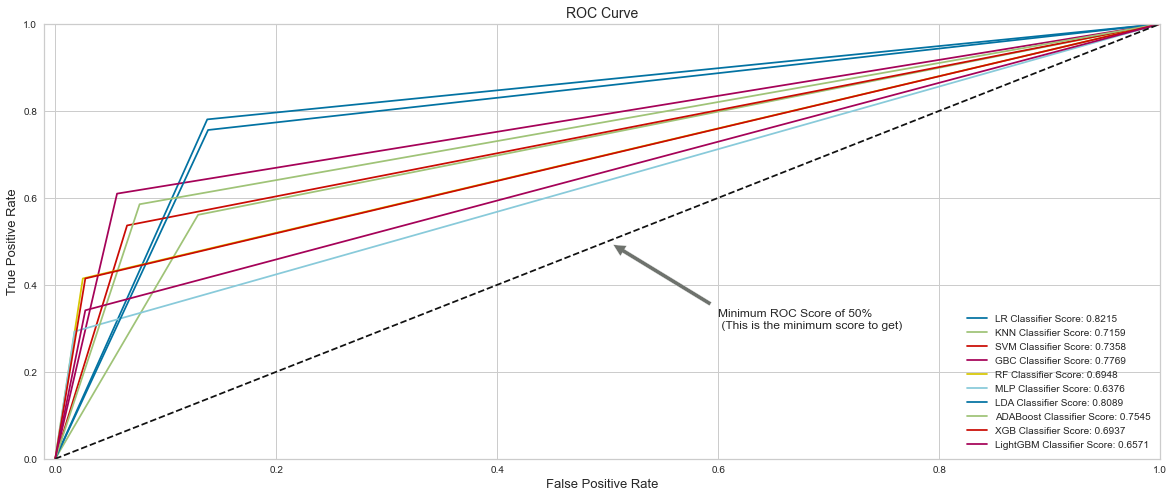

In [60]:
models = get_model()
names,results,result_df= bl_performance(X_train_prepared_PCA, y_train,models)

result_df.sort_values(by='F1',ascending=False,inplace=True)

import plotly.express as px
df = px.data.tips()
fig = px.bar(result_df, x="Model", y=['Accuracy','F1','Recall','Precision'], barmode='group',
             height=400)

fig.update_yaxes(title_text="Model Metrics")
fig.update_layout(
    title_text="Model Performance"
)
fig.show()

In [61]:
result_df

Model  Accuracy        F1    Recall  Precision
5       MLP  0.977120  0.820392  0.998443   0.748004
4        RF  0.967839  0.802394  0.987609   0.733706
8       XGB  0.967967  0.786787  0.986995   0.717464
9  LightGBM  0.965043  0.780368  0.989407   0.712426
2       SVM  0.925762  0.707179  0.964836   0.653831
1       KNN  0.928436  0.697803  0.998189   0.638664
3       GBC  0.908598  0.689298  0.938694   0.647538
7  ADABoost  0.850115  0.633887  0.861739   0.623419
0        LR  0.823039  0.612018  0.862250   0.608415
6       LDA  0.816810  0.607904  0.876749   0.602370

In [62]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(result_df, x="Model", y=['Accuracy','F1','Recall','Precision'], barmode='group',
             height=400)

fig.update_yaxes(title_text="Model Metrics")
fig.update_layout(
    title_text="Model Performance"
)
fig.show()

### t-SNE

Text(0, 0.5, 'Embedding 2')

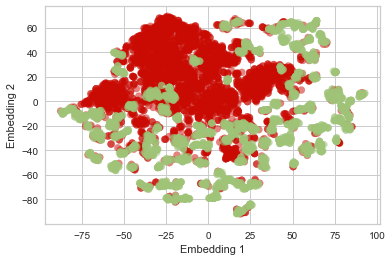

In [63]:
from sklearn.manifold import TSNE
ts = TSNE()
X_tsne = ts.fit_transform(X_train_prepared)
fig, ax = plt.subplots(figsize=(6, 4))
colors = ["rg"[j] for j in y_train['Bankrupt?']]
scat = ax.scatter(
 X_tsne[:, 0],
 X_tsne[:, 1],
 c=colors,
 alpha=0.5,
)
ax.set_xlabel("Embedding 1")
ax.set_ylabel("Embedding 2")

In [64]:
ts = TSNE(n_components=3)
X_tsne = ts.fit_transform(X_train_prepared)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([0.03628898, 0.02174711, 0.02296662, 0.02199841, 0.02004576]), 'score_time': array([0.00900888, 0.00900483, 0.00998068, 0.00898671, 0.00899529]), 'test_accuracy': array([0.72045743, 0.7221869 , 0.80991736, 0.70947235, 0.70565798]), 'test_f1': array([0.16030534, 0.13465347, 0.78809355, 0.83004835, 0.82743198]), 'test_recall': array([0.89361702, 0.85      , 0.79428571, 0.70947235, 0.70565798]), 'test_precision': array([0.08805031, 0.07311828, 0.78199719, 1.        , 1.        ])}
LR: CV accuracy mean: 0.7335
LR: CV F1 score mean: 0.5481
LR: CV Recall score mean: 0.7906
LR: CV Precision score mean: 0.5886


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\sit

{'fit_time': array([0.02274704, 0.01801491, 0.01499891, 0.0149796 , 0.01906776]), 'score_time': array([0.12387061, 0.11855054, 0.08926463, 0.09395838, 0.09915257]), 'test_accuracy': array([0.88182973, 0.89256198, 0.94214876, 0.98474253, 0.9885569 ]), 'test_f1': array([0.33571429, 0.32128514, 0.93872054, 0.99231262, 0.99424552]), 'test_recall': array([1.        , 1.        , 0.99571429, 0.98474253, 0.9885569 ]), 'test_precision': array([0.20171674, 0.19138756, 0.88789809, 1.        , 1.        ])}
KNN: CV accuracy mean: 0.938
KNN: CV F1 score mean: 0.7165
KNN: CV Recall score mean: 0.9938
KNN: CV Precision score mean: 0.6562


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([1.49561   , 1.40289044, 1.47208595, 1.42670321, 1.63157344]), 'score_time': array([0.53227949, 0.56246352, 0.60123324, 0.67518187, 0.7170682 ]), 'test_accuracy': array([0.78780178, 0.80228862, 0.86458996, 0.85950413, 0.84678957]), 'test_f1': array([0.21226415, 0.20460358, 0.85656566, 0.92444444, 0.91703959]), 'test_recall': array([0.95744681, 1.        , 0.90857143, 0.85950413, 0.84678957]), 'test_precision': array([0.1193634 , 0.11396011, 0.81019108, 1.        , 1.        ])}
SVM: CV accuracy mean: 0.8322
SVM: CV F1 score mean: 0.623
SVM: CV Recall score mean: 0.9145
SVM: CV Precision score mean: 0.6087


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([1.44939637, 1.41903186, 1.39710975, 1.39824247, 1.39729095]), 'score_time': array([0.0129981 , 0.01299882, 0.01407981, 0.01500893, 0.01399922]), 'test_accuracy': array([0.86022872, 0.86904005, 0.89701208, 0.88366179, 0.8633185 ]), 'test_f1': array([0.29936306, 0.27464789, 0.88888889, 0.93823827, 0.9266462 ]), 'test_recall': array([1.        , 0.975     , 0.92571429, 0.88366179, 0.8633185 ]), 'test_precision': array([0.17602996, 0.15983607, 0.85488127, 1.        , 1.        ])}
GBC: CV accuracy mean: 0.8747
GBC: CV F1 score mean: 0.6656
GBC: CV Recall score mean: 0.9295
GBC: CV Precision score mean: 0.6381


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-p

{'fit_time': array([1.14201021, 1.15451503, 1.14024854, 1.18336916, 0.71929932]), 'score_time': array([0.06515861, 0.05899715, 0.06876993, 0.09213877, 0.03398967]), 'test_accuracy': array([0.9205845 , 0.92307692, 0.95549905, 0.97075652, 0.9612206 ]), 'test_f1': array([0.42922374, 0.39800995, 0.95212038, 0.98516129, 0.9802269 ]), 'test_recall': array([1.        , 1.        , 0.99428571, 0.97075652, 0.9612206 ]), 'test_precision': array([0.27325581, 0.2484472 , 0.91338583, 1.        , 1.        ])}
RF: CV accuracy mean: 0.9462
RF: CV F1 score mean: 0.7489
RF: CV Recall score mean: 0.9853
RF: CV Precision score mean: 0.687


<ipython-input-26-59f08d07b712>:60: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-

{'fit_time': array([10.27481842, 10.41206312, 10.45020199,  8.86488461, 10.12742543]), 'score_time': array([0.03490663, 0.01123285, 0.01100063, 0.01199102, 0.01205277]), 'test_accuracy': array([0.8252859 , 0.82390337, 0.89256198, 0.84933249, 0.89891926]), 'test_f1': array([0.25474255, 0.22408964, 0.88650101, 0.9185287 , 0.94676933]), 'test_recall': array([1.        , 1.        , 0.94285714, 0.84933249, 0.89891926]), 'test_precision': array([0.14596273, 0.12618297, 0.8365019 , 1.        , 1.        ])}
MLP: CV accuracy mean: 0.858
MLP: CV F1 score mean: 0.6461
MLP: CV Recall score mean: 0.9382
MLP: CV Precision score mean: 0.6217


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([0.00899911, 0.00896239, 0.01199865, 0.01510096, 0.01306009]), 'score_time': array([0.0089879 , 0.00999379, 0.0109396 , 0.01291871, 0.00895166]), 'test_accuracy': array([0.73125794, 0.73045137, 0.80737444, 0.7107438 , 0.70692943]), 'test_f1': array([0.16568047, 0.13821138, 0.78341673, 0.83091787, 0.8283054 ]), 'test_recall': array([0.89361702, 0.85      , 0.78285714, 0.7107438 , 0.70692943]), 'test_precision': array([0.09130435, 0.07522124, 0.78397711, 1.        , 1.        ])}
LDA: CV accuracy mean: 0.7374
LDA: CV F1 score mean: 0.5493
LDA: CV Recall score mean: 0.7888
LDA: CV Precision score mean: 0.5901


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([0.51138163, 0.47452307, 0.45966673, 0.45957971, 0.44653559]), 'score_time': array([0.03499579, 0.03391361, 0.03404951, 0.03529668, 0.03347325]), 'test_accuracy': array([0.8043202 , 0.81818182, 0.83916084, 0.77304514, 0.75524476]), 'test_f1': array([0.21827411, 0.1875    , 0.82069454, 0.87199713, 0.86055777]), 'test_recall': array([0.91489362, 0.825     , 0.82714286, 0.77304514, 0.75524476]), 'test_precision': array([0.12391931, 0.10576923, 0.81434599, 1.        , 1.        ])}
ADABoost: CV accuracy mean: 0.798
ADABoost: CV F1 score mean: 0.5918
ADABoost: CV Recall score mean: 0.8191
ADABoost: CV Precision score mean: 0.6088


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[02:44:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[02:44:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[02:44:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[02:44:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[02:44:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'fit_time': array([0.60574174, 0.59559417, 0.60613585, 0.5971415 , 0.60055518]), 'score_time': array([0.01248121, 0.0117321 , 0.01395488, 0.01300788, 0.01199865]), 'test_accuracy': array([0.90025413, 0.91417673, 0.94787031, 0.96185633, 0.95295613]), 'test_f1': array([0.37450199, 0.37209302, 0.94398907, 0.98055736, 0.97591146]), 'test_recall': array([1.        , 1.        , 0.98714286, 0.96185633, 0.95295613]), 'test_precision': array([0.23039216, 0.22857143, 0.90445026, 1.        , 1.        ])}
XGB: CV accuracy mean: 0.9354
XGB: CV F1 score mean: 0.7294
XGB: CV Recall score mean: 0.9804
XGB: CV Precision score mean: 0.6727
[02:44:21] WARNING: C:/Users/Administrator/workspace/xgbo

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was p

{'fit_time': array([0.12408209, 0.13619256, 0.12324619, 0.14044023, 0.12677884]), 'score_time': array([0.01400042, 0.01410103, 0.0153904 , 0.01397824, 0.01431942]), 'test_accuracy': array([0.90406607, 0.91417673, 0.94214876, 0.96694215, 0.96439924]), 'test_f1': array([0.38367347, 0.36018957, 0.93771389, 0.98319328, 0.98187702]), 'test_recall': array([1.        , 0.95      , 0.97857143, 0.96694215, 0.96439924]), 'test_precision': array([0.23737374, 0.22222222, 0.90013141, 1.        , 1.        ])}
LightGBM: CV accuracy mean: 0.9383
LightGBM: CV F1 score mean: 0.7293
LightGBM: CV Recall score mean: 0.972
LightGBM: CV Precision score mean: 0.6719


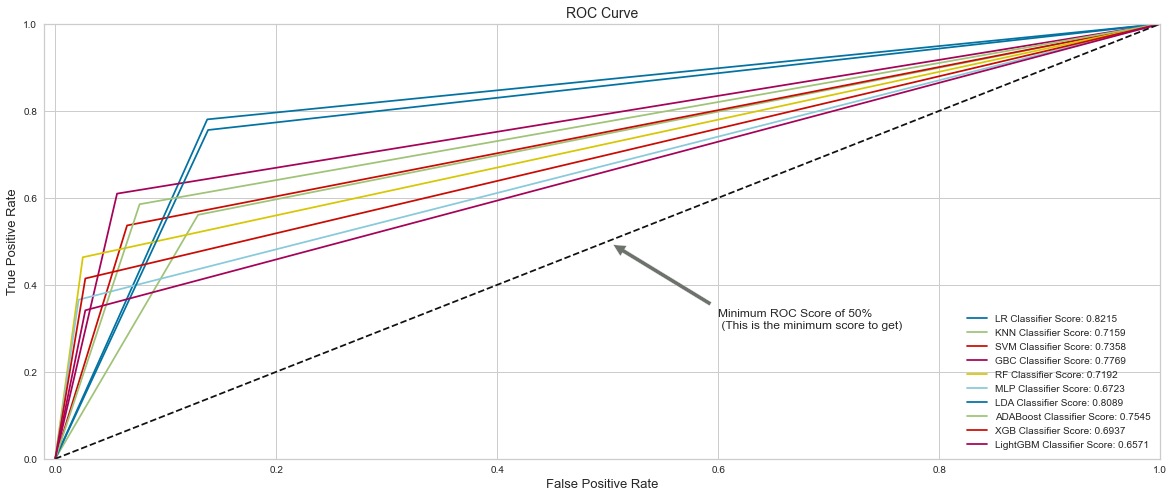

In [65]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

models = get_model()
names,results,result_df= bl_performance(X_tsne, y_train,models)

In [66]:
result_df.sort_values(by='F1',ascending=False,inplace=True)
result_df

Model  Accuracy        F1    Recall  Precision
4        RF  0.946228  0.748948  0.985253   0.687018
8       XGB  0.935423  0.729411  0.980391   0.672683
9  LightGBM  0.938347  0.729329  0.971983   0.671945
1       KNN  0.937968  0.716456  0.993803   0.656200
3       GBC  0.874652  0.665557  0.929539   0.638149
5       MLP  0.858001  0.646126  0.938222   0.621730
2       SVM  0.832195  0.622983  0.914462   0.608703
7  ADABoost  0.797991  0.591805  0.819065   0.608807
6       LDA  0.737351  0.549306  0.788829   0.590101
0        LR  0.733538  0.548107  0.790607   0.588633

In [67]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(result_df, x="Model", y=['Accuracy','F1','Recall','Precision'], barmode='group',
             height=400)

fig.update_yaxes(title_text="Model Metrics")
fig.update_layout(
    title_text="Model Performance"
)
fig.show()

### PHATE

Calculating PHATE...
  Running PHATE on 7866 observations and 51 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 10.23 seconds.
    Calculating affinities...
    Calculated affinities in 0.31 seconds.
  Calculated graph and diffusion operator in 10.58 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 2.49 seconds.
    Calculating KMeans...
    Calculated KMeans in 34.12 seconds.
  Calculated landmark operator in 39.02 seconds.
  Calculating optimal t...
    Automatically selected t = 11
  Calculated optimal t in 9.33 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 2.00 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 16.47 seconds.
Calculated PHATE in 77.42 seconds.


<ipython-input-68-951f41617e92>:6: DeprecationWarning:

Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated since version 1.0.0.



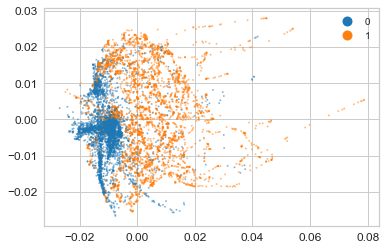

In [68]:
import phate
p = phate.PHATE(random_state=42)
X_phate = p.fit_transform(X_train_prepared)
X_phate.shape
fig, ax = plt.subplots(figsize=(6, 4))
phate.plot.scatter2d(p, c=y_train['Bankrupt?'], ax=ax, alpha=0.5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([0.03041434, 0.02399158, 0.02265191, 0.02535844, 0.0251379 ]), 'score_time': array([0.01668358, 0.00993466, 0.00899506, 0.00872564, 0.00901222]), 'test_accuracy': array([0.02986023, 0.02542912, 0.86586141, 0.05594406, 0.06484425]), 'test_f1': array([0.0579889 , 0.04959702, 0.84194757, 0.10596026, 0.12179104]), 'test_recall': array([1.        , 1.        , 0.80285714, 0.05594406, 0.06484425]), 'test_precision': array([0.02986023, 0.02542912, 0.88503937, 1.        , 1.        ])}
LR: CV accuracy mean: 0.2084
LR: CV F1 score mean: 0.2355
LR: CV Recall score mean: 0.5847
LR: CV Precision score mean: 0.5881


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-package

{'fit_time': array([0.01639652, 0.01513386, 0.01501393, 0.01399565, 0.01299548]), 'score_time': array([0.12753654, 0.09738874, 0.10403776, 0.09839177, 0.09216309]), 'test_accuracy': array([0.86721728, 0.8588684 , 0.90400509, 0.92053401, 0.91099809]), 'test_f1': array([0.30564784, 0.26490066, 0.89550173, 0.95862297, 0.95342648]), 'test_recall': array([0.9787234 , 1.        , 0.92428571, 0.92053401, 0.91099809]), 'test_precision': array([0.18110236, 0.15267176, 0.86845638, 1.        , 1.        ])}
KNN: CV accuracy mean: 0.8923
KNN: CV F1 score mean: 0.6756
KNN: CV Recall score mean: 0.9469
KNN: CV Precision score mean: 0.6404


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\va

{'fit_time': array([1.41276431, 1.40973902, 1.3568151 , 1.30053449, 1.28012156]), 'score_time': array([0.50645924, 0.4973228 , 0.49870038, 0.47204256, 0.47312951]), 'test_accuracy': array([0.87484117, 0.87984743, 0.87730451, 0.82962492, 0.82962492]), 'test_f1': array([0.30388693, 0.28679245, 0.8612509 , 0.90687978, 0.90687978]), 'test_recall': array([0.91489362, 0.95      , 0.85571429, 0.82962492, 0.82962492]), 'test_precision': array([0.18220339, 0.16888889, 0.86685962, 1.        , 1.        ])}
SVM: CV accuracy mean: 0.8582
SVM: CV F1 score mean: 0.6531
SVM: CV Recall score mean: 0.876
SVM: CV Precision score mean: 0.6436


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([1.03666925, 1.16824746, 1.09163809, 1.02462125, 1.05674744]), 'score_time': array([0.01294374, 0.01204205, 0.01200747, 0.01198196, 0.01726627]), 'test_accuracy': array([0.86975858, 0.87158296, 0.89701208, 0.88556898, 0.86840432]), 'test_f1': array([0.30976431, 0.28368794, 0.88655462, 0.9393122 , 0.92956788]), 'test_recall': array([0.9787234 , 1.        , 0.90428571, 0.88556898, 0.86840432]), 'test_precision': array([0.184     , 0.16528926, 0.86950549, 1.        , 1.        ])}
GBC: CV accuracy mean: 0.8785
GBC: CV F1 score mean: 0.6698
GBC: CV Recall score mean: 0.9274
GBC: CV Precision score mean: 0.6438


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-p

{'fit_time': array([1.2982254 , 1.28636765, 1.49405265, 1.27730012, 1.28761148]), 'score_time': array([0.09019876, 0.0817678 , 0.06494546, 0.07727981, 0.07111883]), 'test_accuracy': array([0.87357052, 0.87603306, 0.90527654, 0.91417673, 0.89319771]), 'test_f1': array([0.3161512 , 0.29090909, 0.89616725, 0.9551644 , 0.9435863 ]), 'test_recall': array([0.9787234 , 1.        , 0.91857143, 0.91417673, 0.89319771]), 'test_precision': array([0.18852459, 0.17021277, 0.87482993, 1.        , 1.        ])}
RF: CV accuracy mean: 0.8925
RF: CV F1 score mean: 0.6804
RF: CV Recall score mean: 0.9409
RF: CV Precision score mean: 0.6467


<ipython-input-26-59f08d07b712>:60: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-

{'fit_time': array([8.3511405 , 8.41021276, 8.64280629, 8.65207958, 8.62354636]), 'score_time': array([0.00956893, 0.01506352, 0.01000571, 0.01156878, 0.0120244 ]), 'test_accuracy': array([0.8703939 , 0.90146217, 0.87094723, 0.76859504, 0.75079466]), 'test_f1': array([0.30612245, 0.31111111, 0.84794007, 0.86915888, 0.85766158]), 'test_recall': array([0.95744681, 0.875     , 0.80857143, 0.76859504, 0.75079466]), 'test_precision': array([0.18218623, 0.18918919, 0.89133858, 1.        , 1.        ])}
MLP: CV accuracy mean: 0.8324
MLP: CV F1 score mean: 0.6384
MLP: CV Recall score mean: 0.8321
MLP: CV Precision score mean: 0.6525


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([0.05164838, 0.00799775, 0.00900078, 0.00936198, 0.00805807]), 'score_time': array([0.00833917, 0.00950193, 0.00900292, 0.00899911, 0.00799823]), 'test_accuracy': array([0.89008895, 0.90273363, 0.84106802, 0.61538462, 0.59249841]), 'test_f1': array([0.33204633, 0.30136986, 0.80031949, 0.76190476, 0.74411178]), 'test_recall': array([0.91489362, 0.825     , 0.71571429, 0.61538462, 0.59249841]), 'test_precision': array([0.20283019, 0.18435754, 0.9076087 , 1.        , 1.        ])}
LDA: CV accuracy mean: 0.7684
LDA: CV F1 score mean: 0.588
LDA: CV Recall score mean: 0.7327
LDA: CV Precision score mean: 0.659


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.

{'fit_time': array([0.414186  , 0.37507582, 0.38939691, 0.41459227, 0.41335344]), 'score_time': array([0.03423047, 0.03528857, 0.03526282, 0.03544831, 0.03199983]), 'test_accuracy': array([0.86658196, 0.88239034, 0.87349015, 0.78448824, 0.75842339]), 'test_f1': array([0.30463576, 0.28571429, 0.85313653, 0.8792305 , 0.8626175 ]), 'test_recall': array([0.9787234 , 0.925     , 0.82571429, 0.78448824, 0.75842339]), 'test_precision': array([0.18039216, 0.16894977, 0.88244275, 1.        , 1.        ])}
ADABoost: CV accuracy mean: 0.8331
ADABoost: CV F1 score mean: 0.6371
ADABoost: CV Recall score mean: 0.8545
ADABoost: CV Precision score mean: 0.6464


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[02:47:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[02:47:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[02:47:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[02:47:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[02:47:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'fit_time': array([0.60176778, 0.58198404, 0.57689047, 0.57968378, 0.56666303]), 'score_time': array([0.01289439, 0.01264334, 0.01300025, 0.01299953, 0.01247573]), 'test_accuracy': array([0.87166455, 0.8747616 , 0.89891926, 0.9020979 , 0.89383344]), 'test_f1': array([0.31292517, 0.28880866, 0.88888889, 0.94852941, 0.94394092]), 'test_recall': array([0.9787234 , 1.        , 0.90857143, 0.9020979 , 0.89383344]), 'test_precision': array([0.18623482, 0.16877637, 0.87004104, 1.        , 1.        ])}
XGB: CV accuracy mean: 0.8883
XGB: CV F1 score mean: 0.6766
XGB: CV Recall score mean: 0.9366
XGB: CV Precision score mean: 0.645
[02:47:46] WARNING: C:/Users/Administrator/workspace/xgboo

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was p

{'fit_time': array([0.11436915, 0.12707663, 0.11757827, 0.12494636, 0.11388183]), 'score_time': array([0.01335359, 0.0140233 , 0.01299977, 0.01385498, 0.01315689]), 'test_accuracy': array([0.86975858, 0.87158296, 0.90336936, 0.92371265, 0.90464081]), 'test_f1': array([0.30976431, 0.27857143, 0.89444444, 0.96034369, 0.94993324]), 'test_recall': array([0.9787234 , 0.975     , 0.92      , 0.92371265, 0.90464081]), 'test_precision': array([0.184     , 0.1625    , 0.87027027, 1.        , 1.        ])}
LightGBM: CV accuracy mean: 0.8946
LightGBM: CV F1 score mean: 0.6786
LightGBM: CV Recall score mean: 0.9404
LightGBM: CV Precision score mean: 0.6434


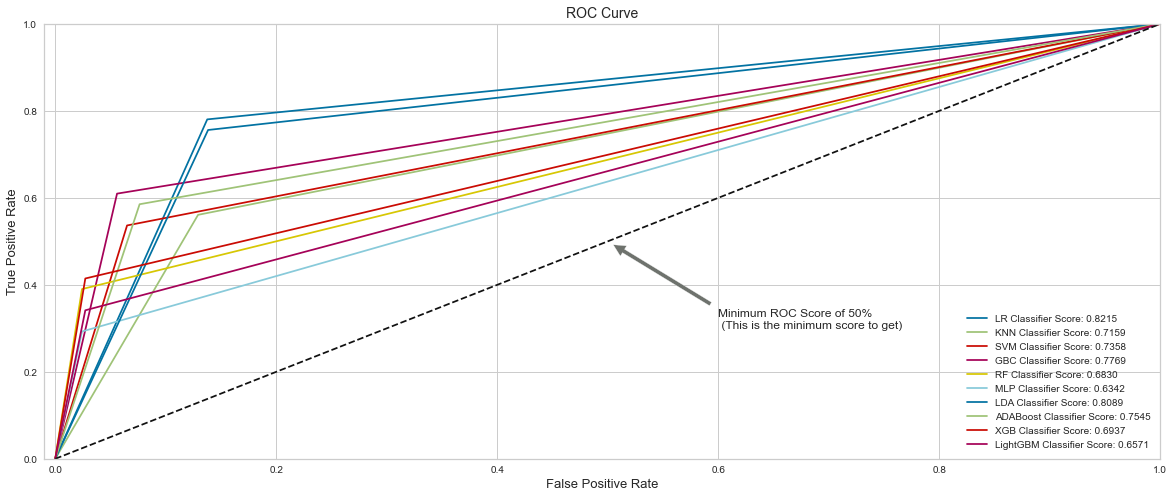

In [69]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

models = get_model()
names,results,result_df= bl_performance(X_phate, y_train,models)

In [70]:
result_df.sort_values(by='F1',ascending=False,inplace=True)
result_df

Model  Accuracy        F1    Recall  Precision
4        RF  0.892451  0.680396  0.940934   0.646713
9  LightGBM  0.894613  0.678611  0.940415   0.643354
8       XGB  0.888255  0.676619  0.936645   0.645010
1       KNN  0.892325  0.675620  0.946908   0.640446
3       GBC  0.878465  0.669777  0.927396   0.643759
2       SVM  0.858249  0.653138  0.875972   0.643590
5       MLP  0.832439  0.638399  0.832082   0.652543
7  ADABoost  0.833075  0.637067  0.854470   0.646357
6       LDA  0.768355  0.587950  0.732698   0.658959
0        LR  0.208388  0.235457  0.584729   0.588066

In [71]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(result_df, x="Model", y=['Accuracy','F1','Recall','Precision'], barmode='group',
             height=400)

fig.update_yaxes(title_text="Model Metrics")
fig.update_layout(
    title_text="Model Performance"
)
fig.show()